In [7]:
# Importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus
from IPython.display import Image
from six import StringIO  

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [8]:
# Loading the dataset

df = pd.read_csv("/kaggle/input/iris-data-decision-tree/Iris.csv")

# Splitting the dataset into features and target variable
X = df.drop(['Species', 'Id'], axis=1) # drop the unnecessary columns
y = df['Species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Creating an instance of the Decision Tree classifier
dtc = DecisionTreeClassifier()

# Fitting the model to the training data
dtc.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = dtc.predict(X_test)

# Evaluating the performance of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


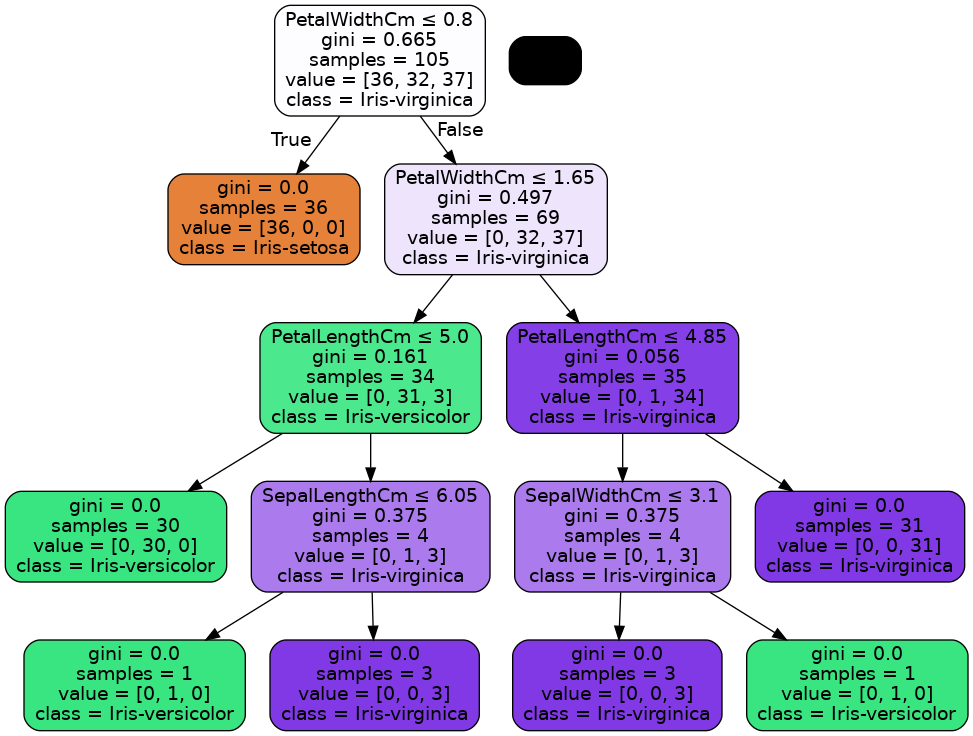

In [9]:
# Visualize the decision tree
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=y.unique())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
# Creating a new dataframe with 4 features
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.2, 7.3, 4.4],
    'sepal_width': [3.5, 2.8, 2.9, 3.0],
    'petal_length': [1.4, 4.8, 6.3, 1.3],
    'petal_width': [0.2, 1.8, 1.8, 0.2]
})

# Set the feature names
new_data.columns = X.columns

# Make predictions on the new data
y_new = dtc.predict(new_data)

# Print the predicted species
print("Predicted species:", y_new)


Predicted species: ['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa']
